In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'D:\Machine_learning\Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Aim : we need to predict customer churn before they decide to leave.
    
""" 
SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
Partner : Whether the customer has a partner or not (Yes, No)
Dependents : Whether the customer has dependents or not (Yes, No)
Tenure : Number of months the customer has stayed with the company
PhoneService : Whether the customer has a phone service or not (Yes, No)
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
"""

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
#number of unique value in each features

for col in df.columns.values:
    print(f"\'{col}\'   has Unique values : {df[col].nunique()}")

'customerID'   has Unique values : 7043
'gender'   has Unique values : 2
'SeniorCitizen'   has Unique values : 2
'Partner'   has Unique values : 2
'Dependents'   has Unique values : 2
'tenure'   has Unique values : 73
'PhoneService'   has Unique values : 2
'MultipleLines'   has Unique values : 3
'InternetService'   has Unique values : 3
'OnlineSecurity'   has Unique values : 3
'OnlineBackup'   has Unique values : 3
'DeviceProtection'   has Unique values : 3
'TechSupport'   has Unique values : 3
'StreamingTV'   has Unique values : 3
'StreamingMovies'   has Unique values : 3
'Contract'   has Unique values : 3
'PaperlessBilling'   has Unique values : 2
'PaymentMethod'   has Unique values : 4
'MonthlyCharges'   has Unique values : 1585
'TotalCharges'   has Unique values : 6531
'Churn'   has Unique values : 2


In [8]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
#Coverting TotalCharges into object type and also coverting errors(Non numeric) into NaN values

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [11]:
cat_col.index

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
for col in list(cat_col.index):
    print(f"-----------{col.title()}-----------")
    total = df[col].value_counts()
    perc  = df[col].value_counts()/ df.shape[0]
    
    df1 = pd.concat([total, perc], keys = ['total', 'percentage'], axis=1)
    print(df1)
    

-----------Customerid-----------
            total  percentage
7590-VHVEG      1    0.000142
3791-LGQCY      1    0.000142
6008-NAIXK      1    0.000142
5956-YHHRX      1    0.000142
5365-LLFYV      1    0.000142
...           ...         ...
9796-MVYXX      1    0.000142
2637-FKFSY      1    0.000142
1552-AAGRX      1    0.000142
4304-TSPVK      1    0.000142
3186-AJIEK      1    0.000142

[7043 rows x 2 columns]
-----------Gender-----------
        total  percentage
Male     3555    0.504756
Female   3488    0.495244
-----------Partner-----------
     total  percentage
No    3641    0.516967
Yes   3402    0.483033
-----------Dependents-----------
     total  percentage
No    4933    0.700412
Yes   2110    0.299588
-----------Phoneservice-----------
     total  percentage
Yes   6361    0.903166
No     682    0.096834
-----------Multiplelines-----------
                  total  percentage
No                 3390    0.481329
Yes                2971    0.421837
No phone service    682   

Text(0.5, 6.79999999999999, 'Churn')

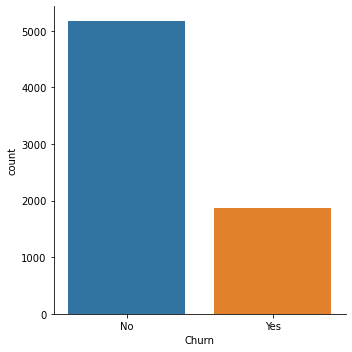

In [13]:
sns.catplot(x = 'Churn', data = df, kind = 'count')
plt.xlabel('Churn')

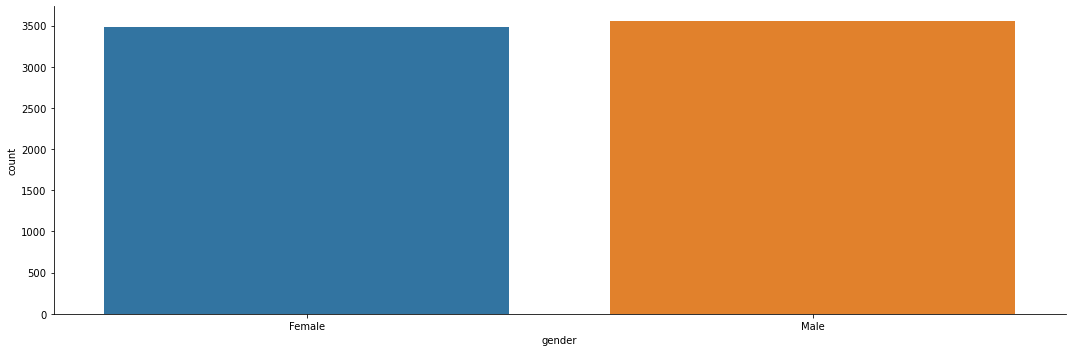

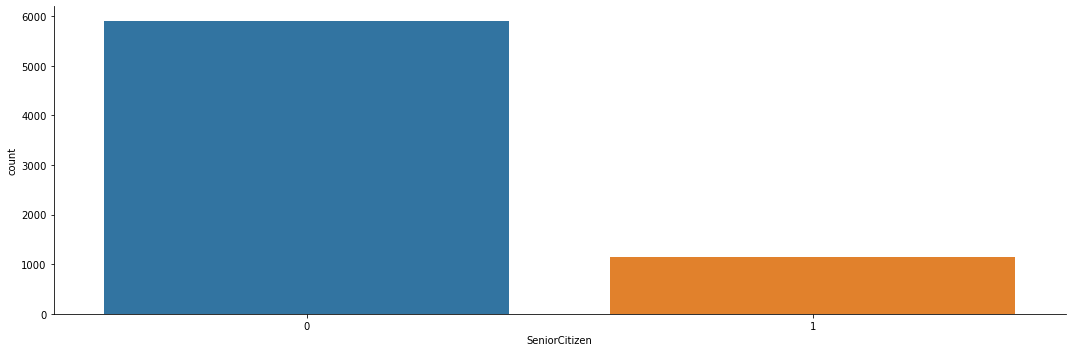

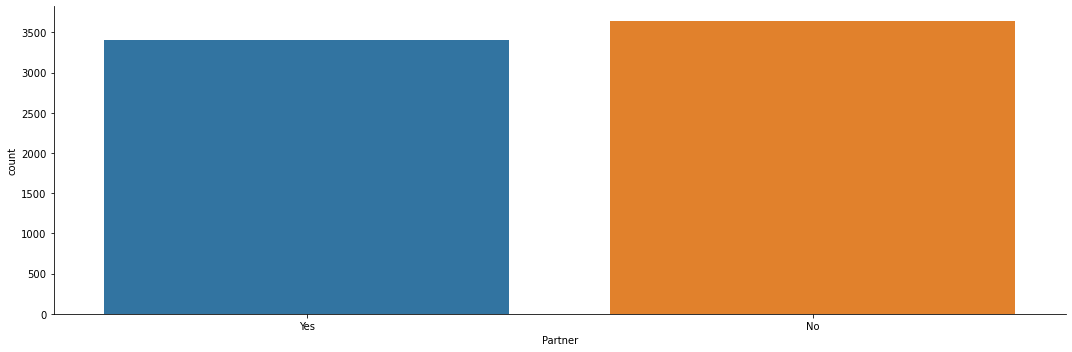

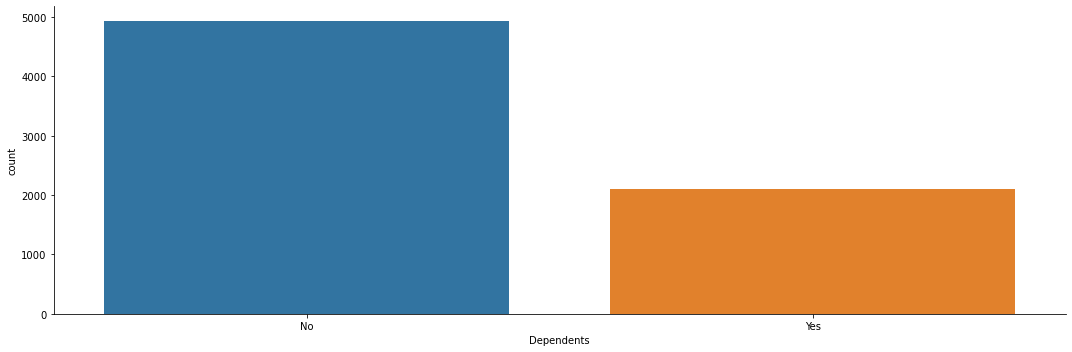

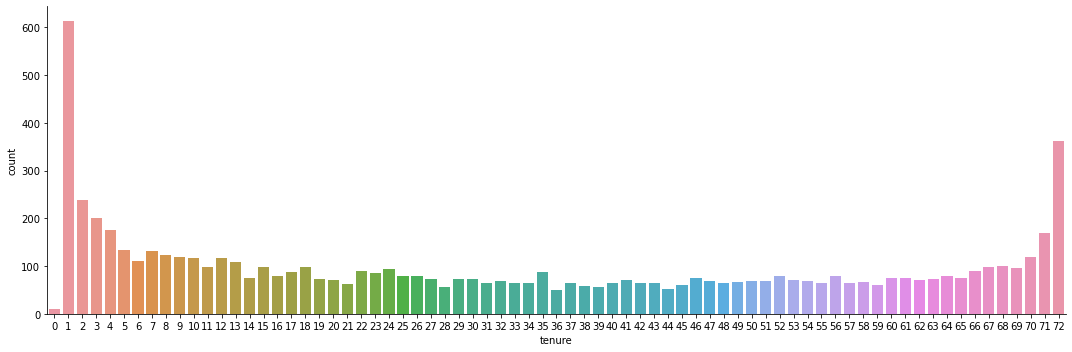

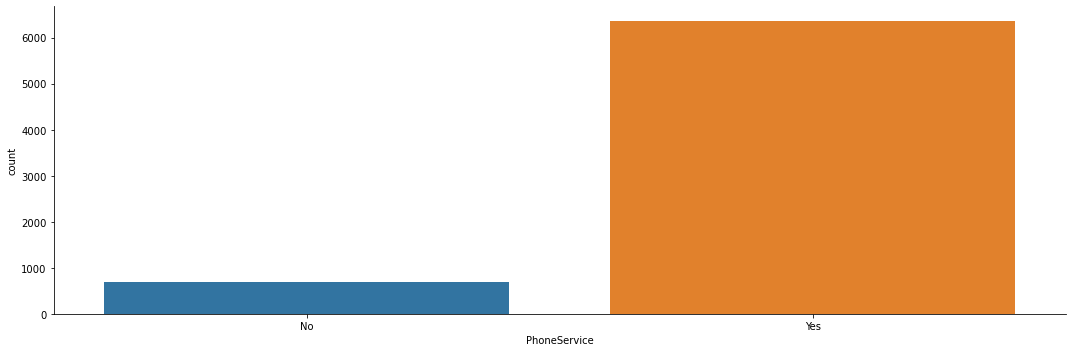

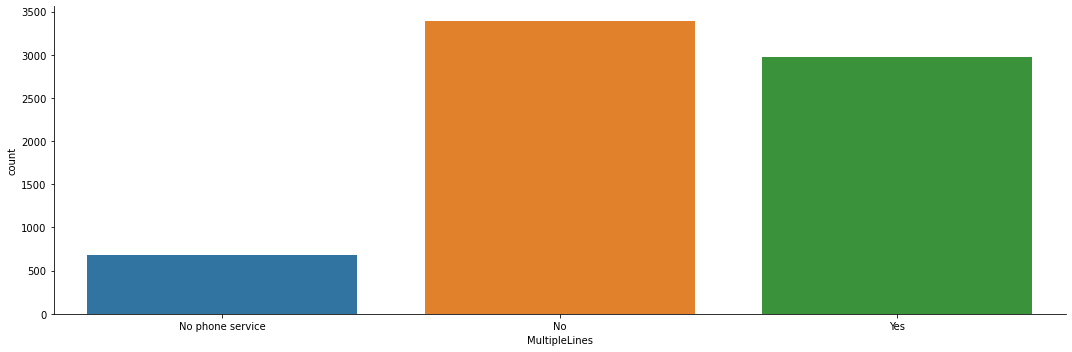

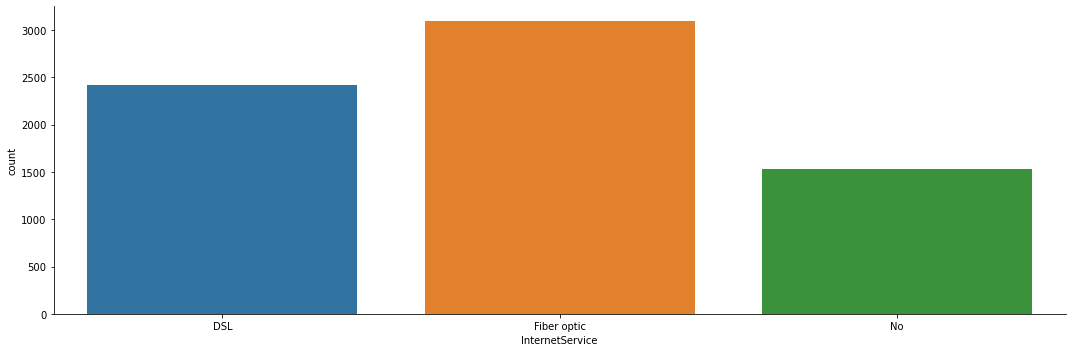

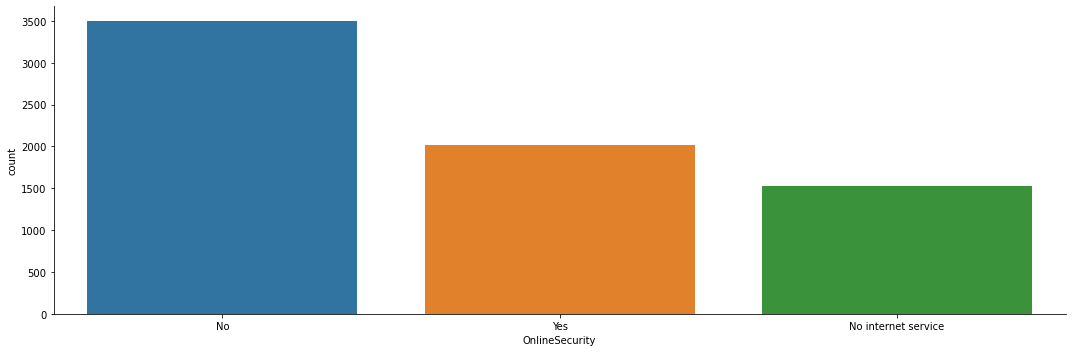

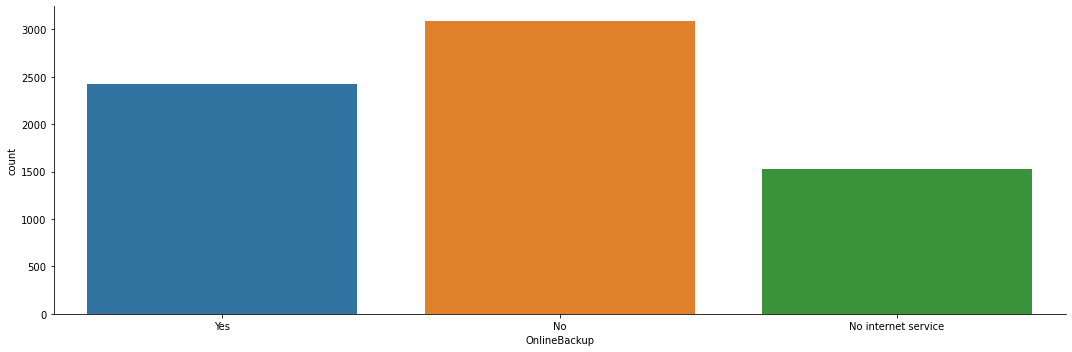

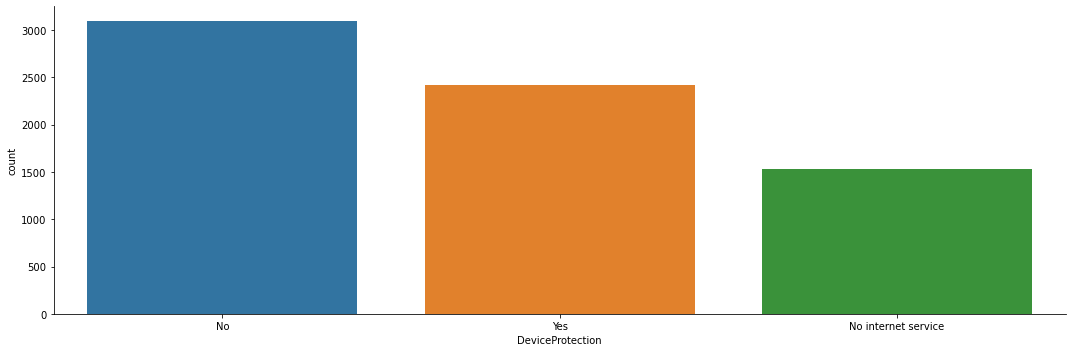

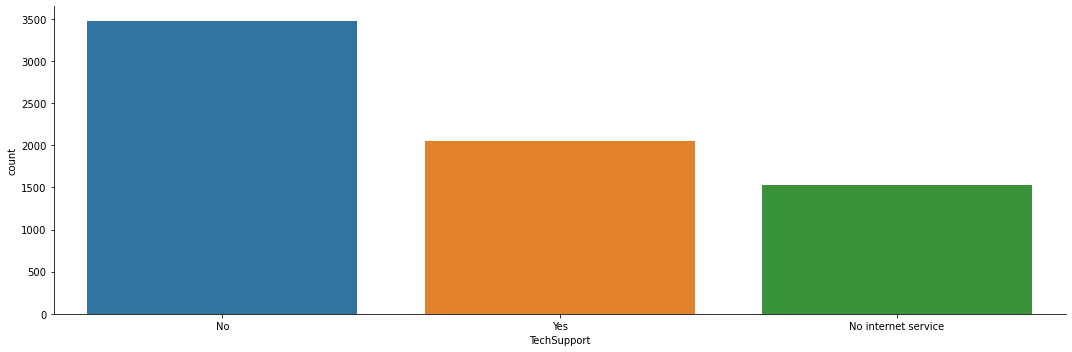

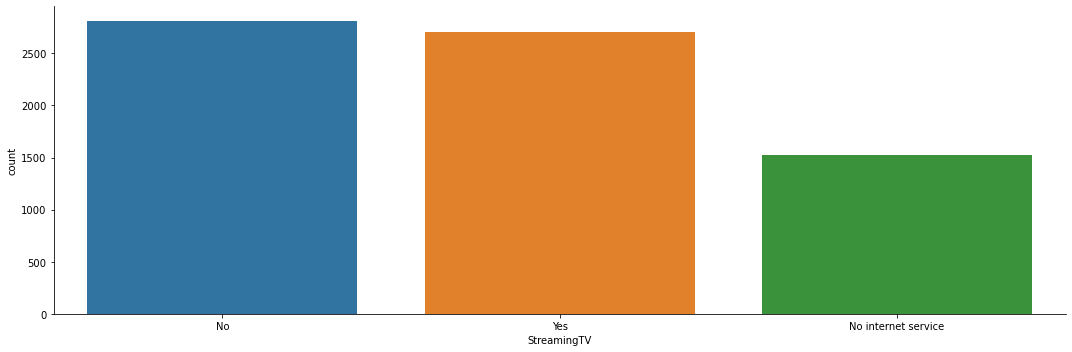

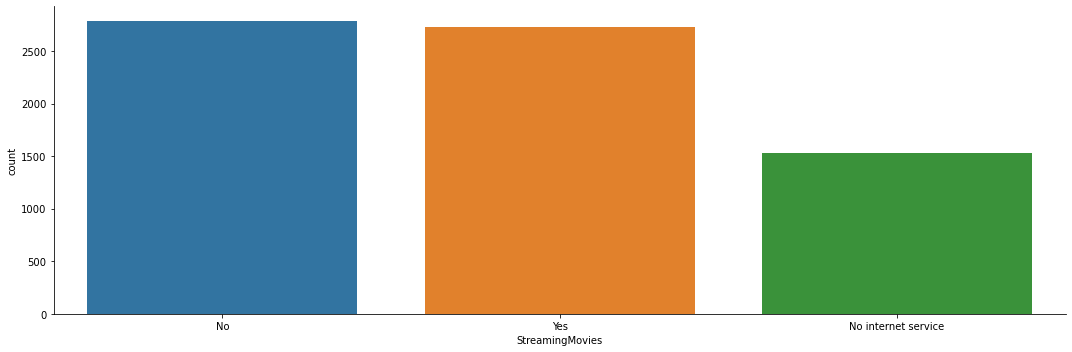

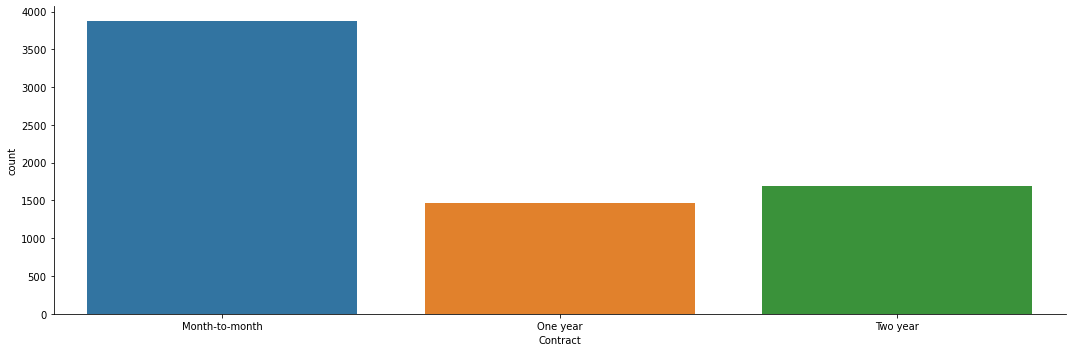

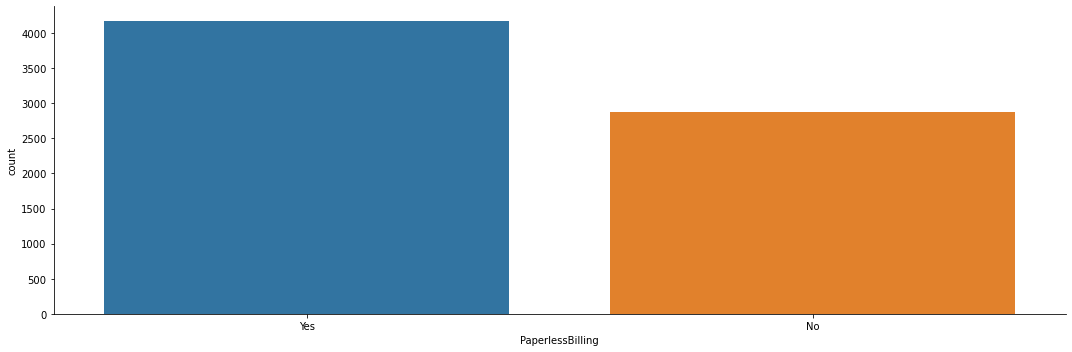

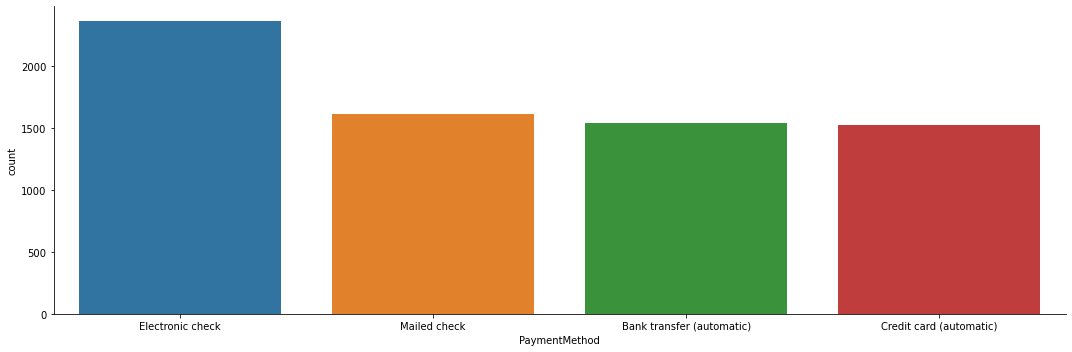

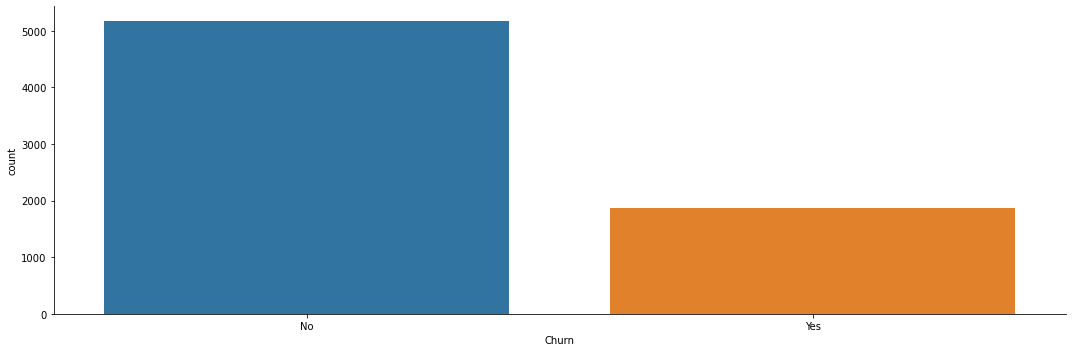

In [14]:
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'], axis = 1).columns.values:
    sns.catplot(x = i, data = df, kind = 'count', aspect =3)
    plt.xlabel(i)

In [ ]:
# Information from the Graph:
"""
Number of customers who are parteners are less.
Males and Females customers are almost equal.
Senior Citizen Customers are less as compared to the young ones.
Customers who don't have dependents are more in number.
As Tenure increases number of Customers also decreases
Customers who uses phone services are more.
Customers who uses Fiber optic internet service are more.
Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup are more.
Customers whose Contract are month to month are more in number than those who have contract yearly and more than that.
Customers who prefer Paperless billing are more in number.
Customers who use Electronic Check are more in number.
Customers who won't leave are more in number.
"""

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

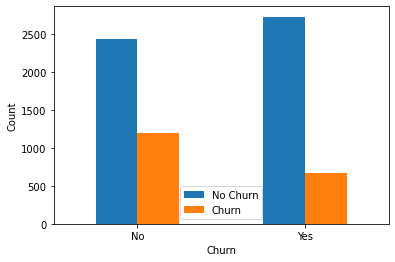

In [15]:
pd.crosstab(df['Partner'], df['Churn']).plot(kind = 'bar')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.legend(["No Churn", "Churn"])
plt.xticks(rotation=0)

SeniorCitizen        AxesSubplot(0.125,0.772143;0.168478x0.107857)
tenure            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
MonthlyCharges    AxesSubplot(0.529348,0.772143;0.168478x0.107857)
TotalCharges      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
dtype: object

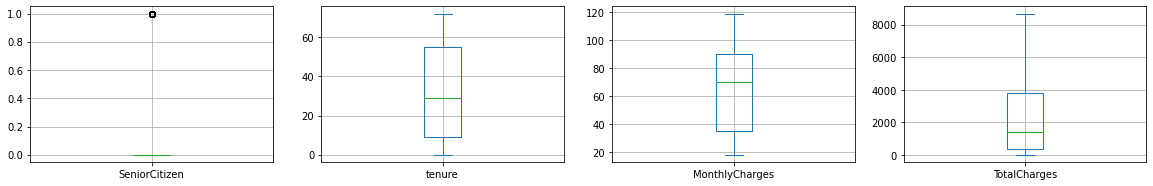

In [16]:
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True)

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

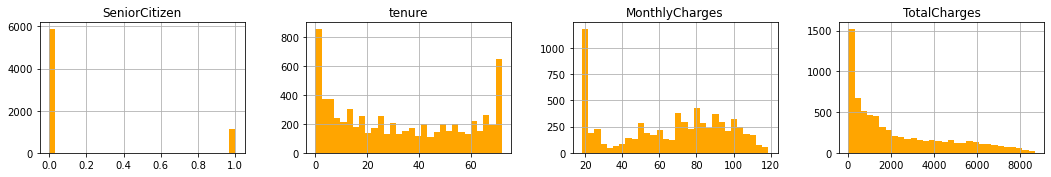

In [17]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(6,4),bins=30,color='orange')

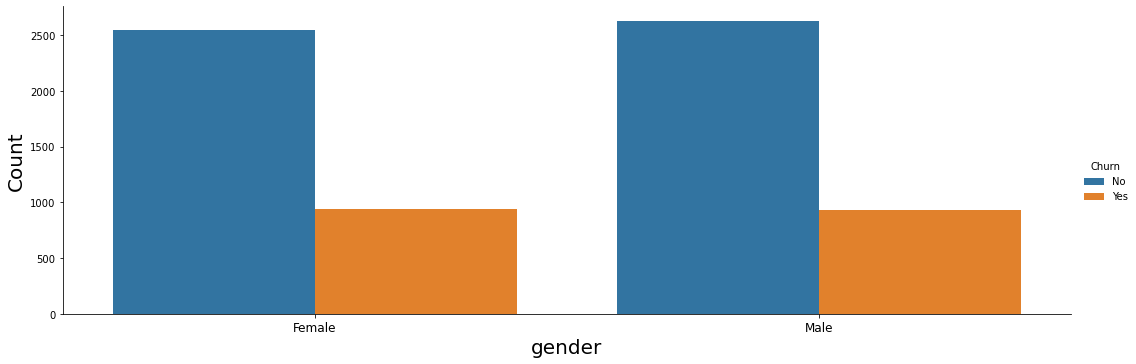

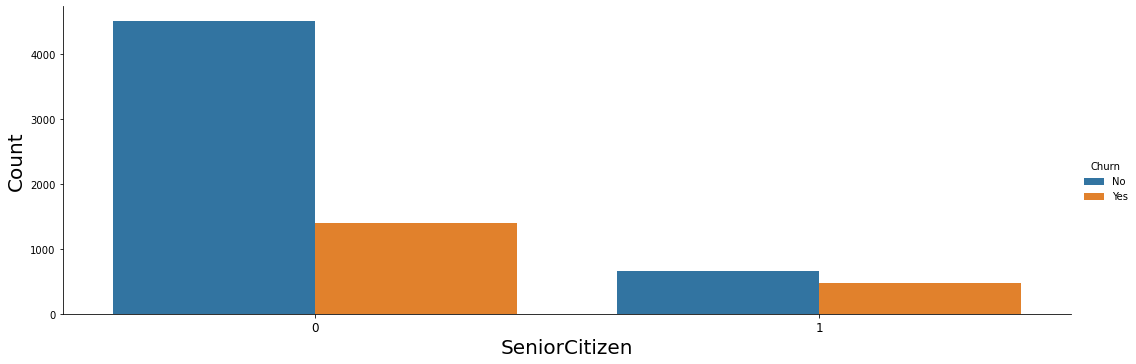

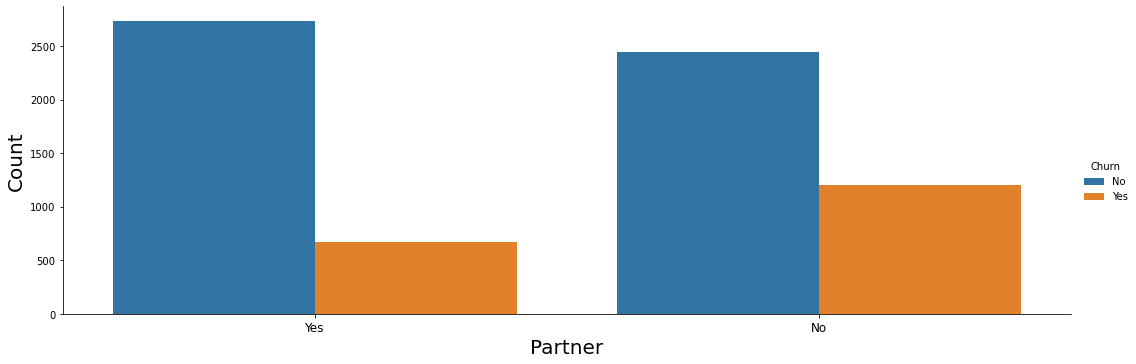

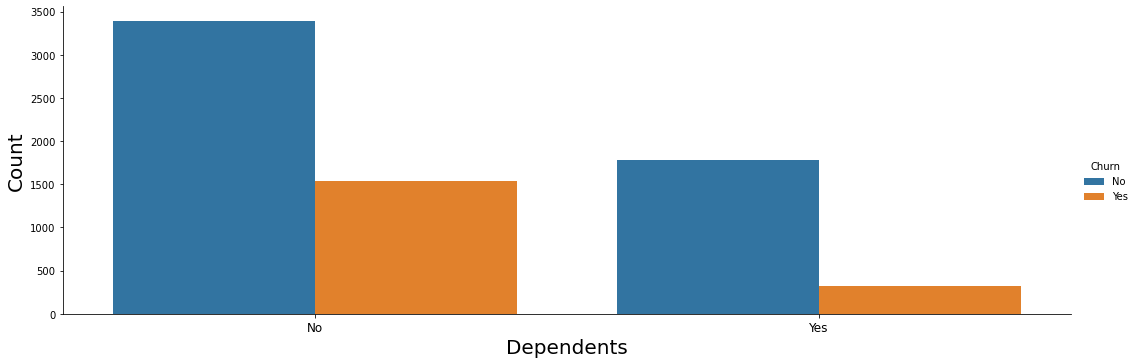

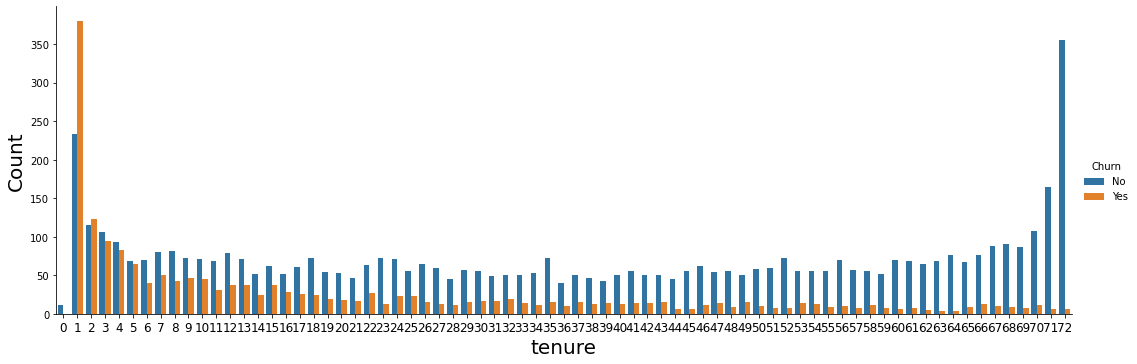

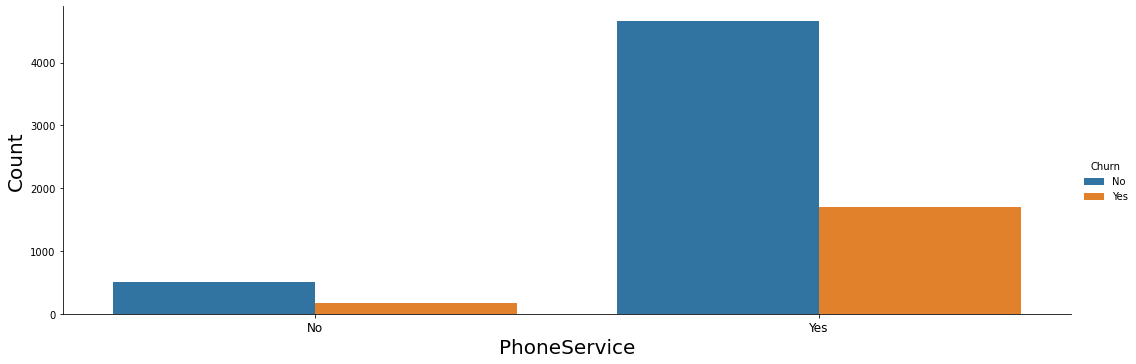

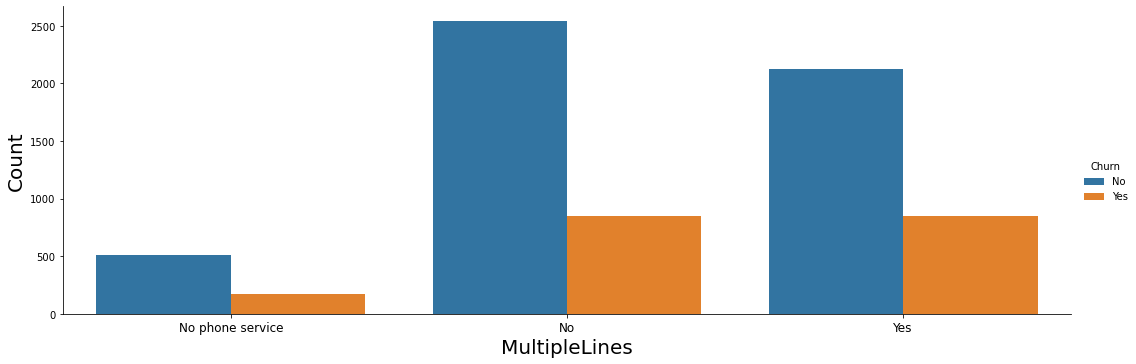

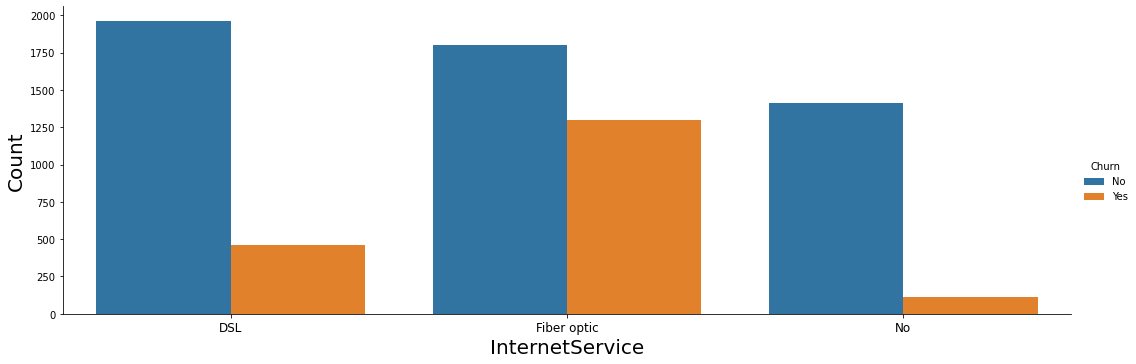

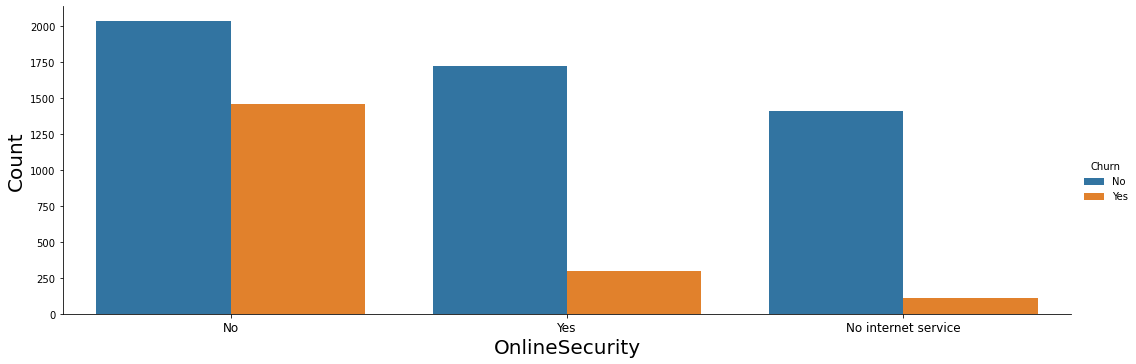

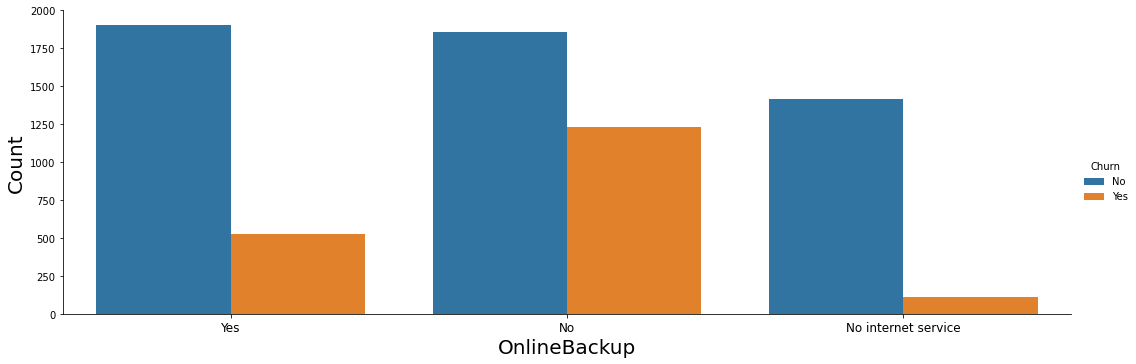

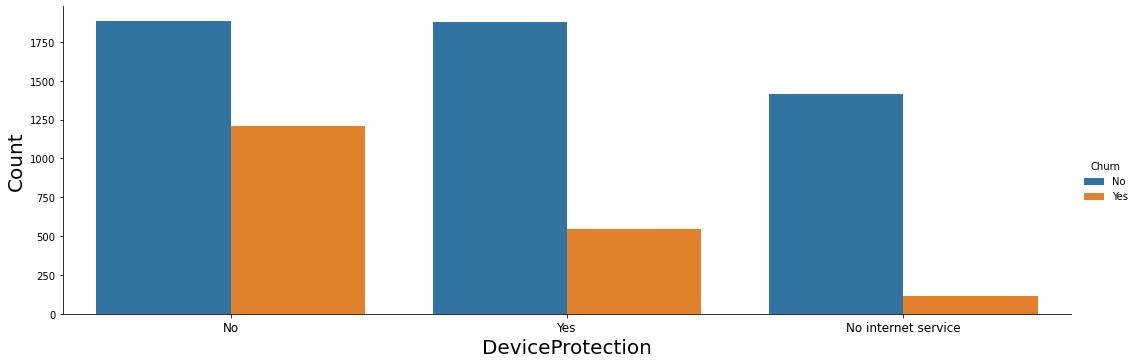

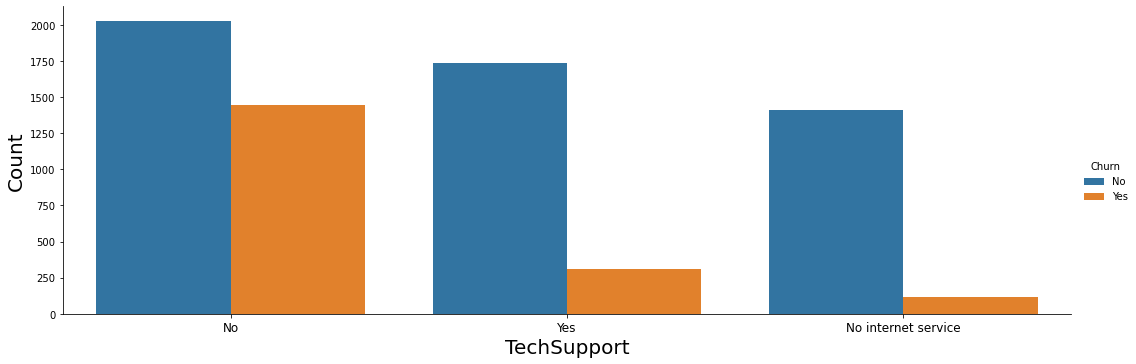

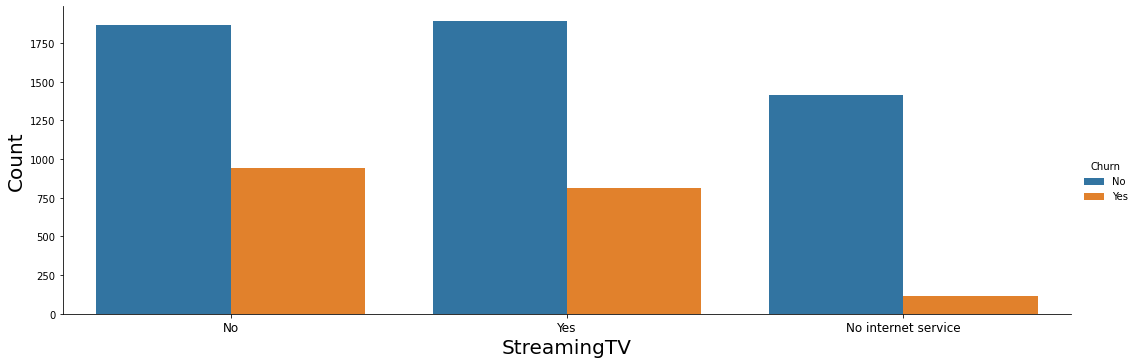

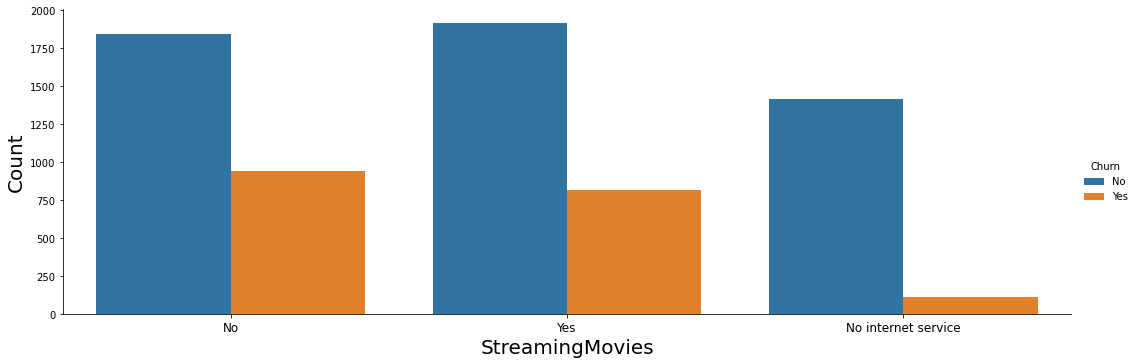

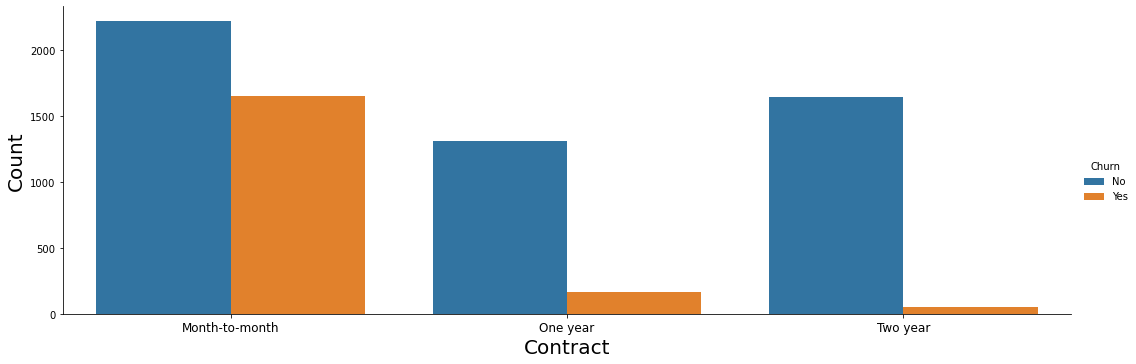

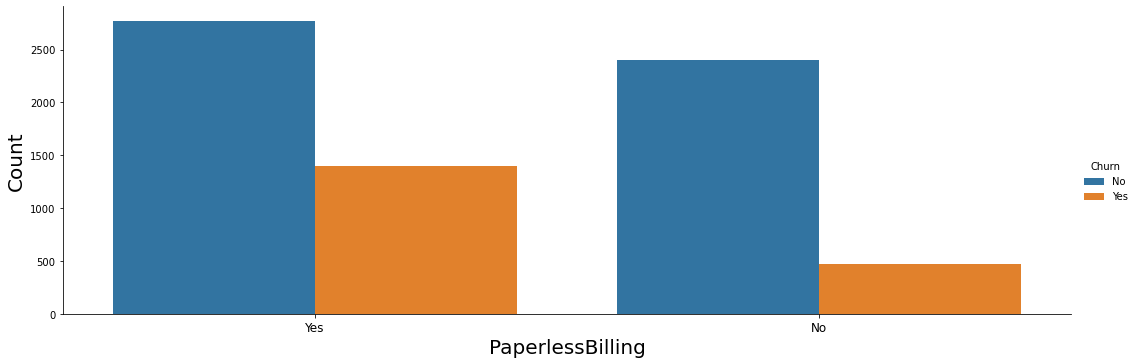

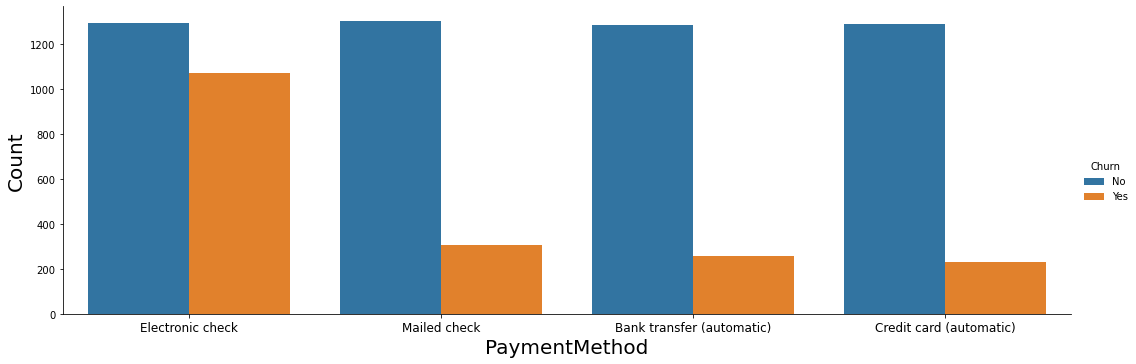

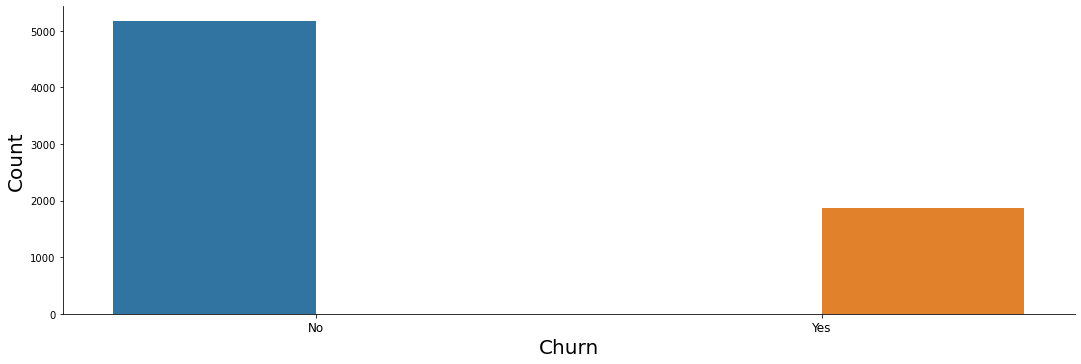

In [18]:
# for loop to plot the graphs between different features counts with respect to the churn..... 
for i in df.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                hue='Churn'
               )
    plt.xticks(rotation= 0,fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)
    plt.xlabel(i,fontsize=20)

In [ ]:
# Information from the Graph:

"""
Number of customers who are parteners are less.
Males and Females customers are almost equal.
Proportion of churn in Senior Citizen Customers are more as compared to the young ones.
Proportion of churn in customers who aren't parteners is more.
Customers who don't have dependents are more in number and have more proportion of churn.
As Tenure increases number of Customers with churn also decreases
Customers who uses phone services have more proportion of churn.
Customers who uses Fiber optic internet service have more proportion of churn.
Customers who don't have any online security, Tech support, Streaming TV, device protection and online backup have more proportion of churn.
Customers whose Contract are month to month are more in number and have more proportion of churn.
Customers who prefer Paperless billing are more in number and have more churn.
Customers who use Electronic Check are more in number and have more churn proportion.
Customers who won't leave are more in number.
"""

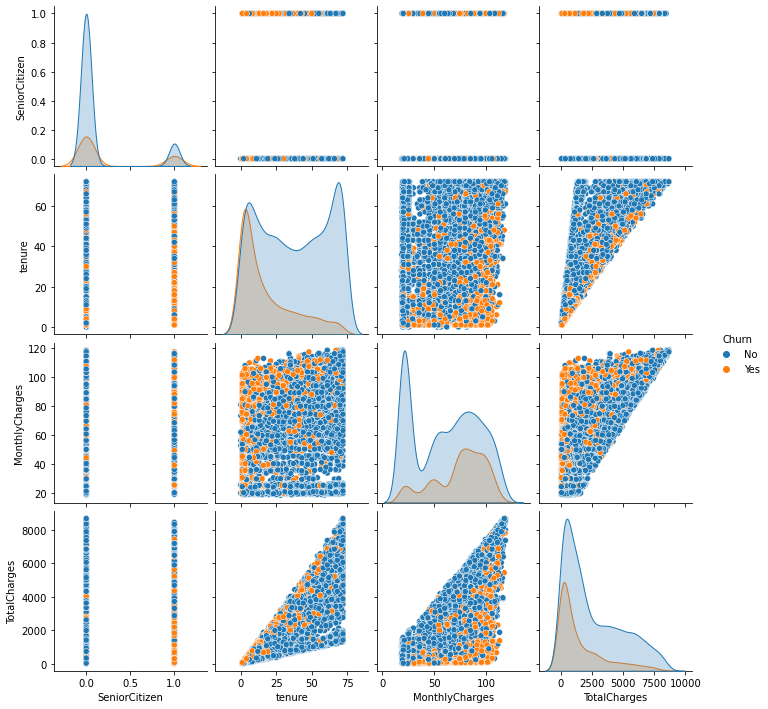

In [19]:
#plotting a pair plot
sns.pairplot(data=df,hue='Churn')

In [20]:
cat_col

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for val in cat_col.index.values:
    df[val] = le.fit_transform(df[val])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [22]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
# filling up NaN values withe in TotalCharges

df.fillna(df.median(), inplace=True)

In [25]:
#lets check skewness
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

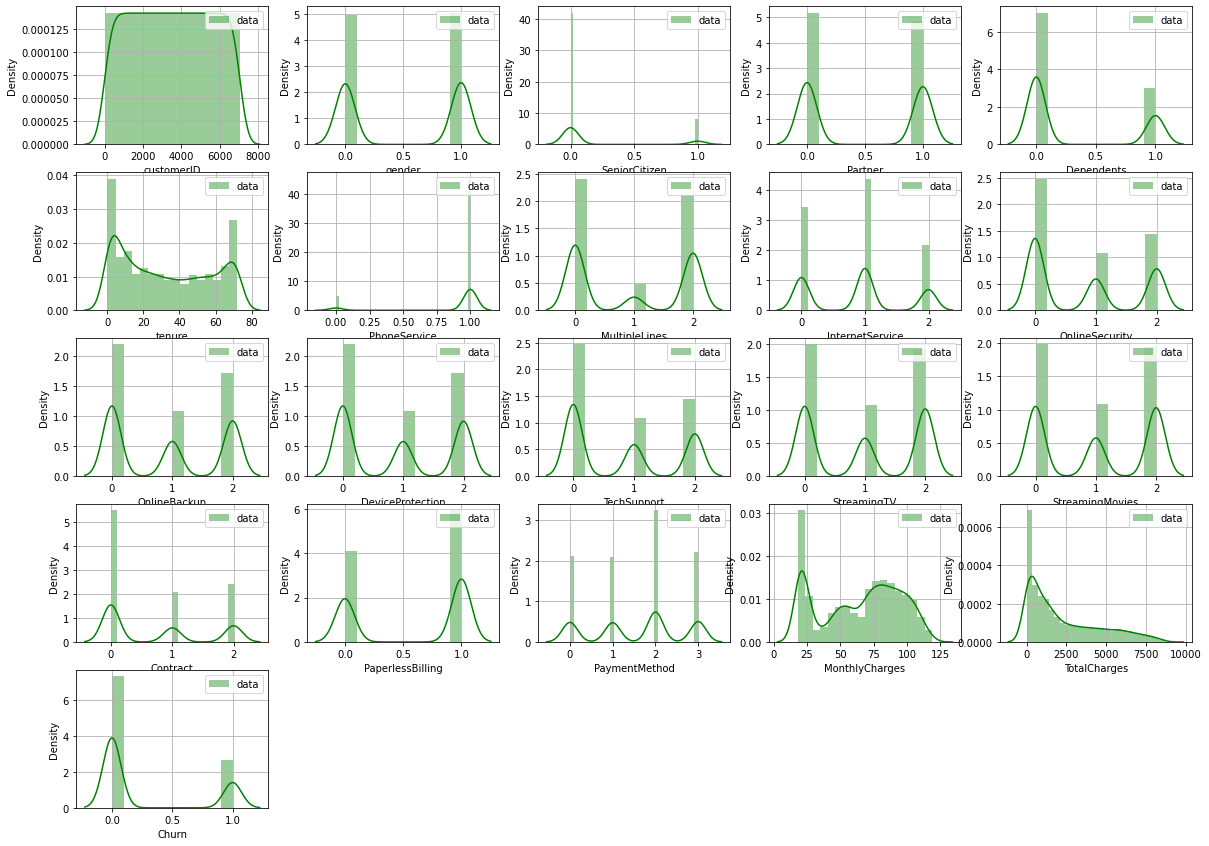

In [31]:
plt.figure(figsize=(20,30))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(10,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')

In [32]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_Churn=df.loc[(z<3).all(axis=1)]
print(df_Churn.shape)#shape of dataset after outliers removed

(7043, 21)
(6361, 21)


<Figure size 3600x2160 with 0 Axes>

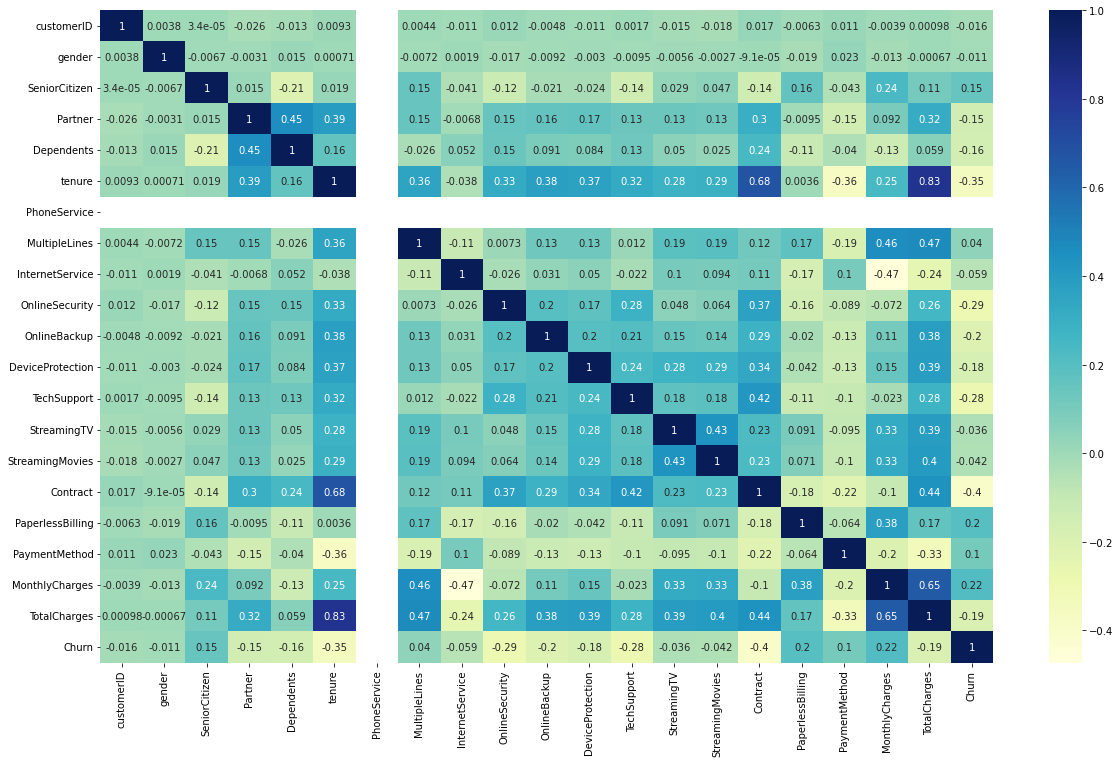

<Figure size 3600x2160 with 0 Axes>

In [40]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df_Churn.corr(), annot = True, cmap = 'YlGnBu')
plt.figure(figsize = (50,30))

In [42]:
df_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,6551,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1002,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0


In [44]:
df_Churn['Contract'].value_counts()

0    3499
2    1534
1    1328
Name: Contract, dtype: int64

In [45]:
# Split data into X and y
X = df_Churn.drop("Churn", axis=1)

y = df_Churn["Churn"]

In [46]:
# Independent variables (no target column)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
5,6551,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50
6,1002,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40


In [47]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [48]:
print(X.shape, y.shape)

(6361, 20) (6361,)


In [49]:
#lets bring all features to common scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x = scaler.fit_transform(X)
x = pd.DataFrame(x,columns=X.columns)
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.218994,0.992638,-0.441591,-0.972245,-0.653600,0.063470,0.0,-0.936163,-1.350531,1.436848,-1.052857,1.262811,-0.935165,-1.148627,-1.152974,0.370335,-1.211765,1.335443,-0.336617,-0.204632
1,-0.468504,0.992638,-0.441591,-0.972245,-0.653600,-1.237704,0.0,-0.936163,-1.350531,1.436848,1.252556,-1.044785,-0.935165,-1.148627,-1.152974,-0.828495,0.825243,1.335443,-0.438432,-0.970053
2,1.472524,-1.007416,-0.441591,-0.972245,-0.653600,-1.237704,0.0,-0.936163,0.046790,-0.929747,-1.052857,-1.044785,-0.935165,-1.148627,-1.152974,-0.828495,0.825243,0.399691,0.114985,-0.951361
3,1.492195,-1.007416,-0.441591,-0.972245,-0.653600,-0.993734,0.0,1.068190,0.046790,-0.929747,-1.052857,1.262811,-0.935165,1.145381,1.141072,-0.828495,0.825243,0.399691,1.065811,-0.663966
4,-1.236654,0.992638,-0.441591,-0.972245,1.529987,-0.424470,0.0,1.068190,0.046790,-0.929747,1.252556,-1.044785,-0.935165,1.145381,-1.152974,-0.828495,0.825243,-0.536060,0.719309,-0.178894


In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [61]:
def find_best_model(x,y):
    algos = {
        'logistic_regression' : {
            'model' : LogisticRegression(),
            'params' : {
                "solver" : ["lbfgs", "sag", "saga"] ,
                "penalty" : ["none", "L1", "L2"]
            }
        },
        
        
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth' : [None, 2,4,5,10],
                'min_samples_split': [2,3,4,5,6,7,8],
                'criterion' : ['gini', 'entropy']
            }
        },
          
        'random_forest' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'n_estimators' : [10,20,40,50,100,120],
                 'max_depth' : [None, 2,4,5,10,20],
                 'min_samples_split': np.array(np.linspace(1,100,10)),
                 'min_samples_leaf' : [2,3,4,5,6,10]
                
            }
        },
        
        'Gradient_Boosting': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators' : [2,5,50,100,250,500],
                'learning_rate' : [0.001, 0.01, 0.1,1,10,100]
            }
        },
        
        'AdaBoost' : {
            'model' : AdaBoostClassifier(),
            'params' : {
                'n_estimators' : [2,5,50,100,250,500],
                'learning_rate' : [0.01, 0.05, 0.1,1,10,100]
            }
        },
        
        
    }
    
    scores = []
    for algo_name, model in algos.items():
        gs = RandomizedSearchCV(model['model'], model['params'], cv = 5 )
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [62]:
find_best_model(X_train, y_train)

,model,best_score,best_params
0,logistic_regression,0.800708,"{'solver': 'sag', 'penalty': 'none'}"
1,decision_tree,0.783412,"{'min_samples_split': 3, 'max_depth': 4, 'crit..."
2,random_forest,0.733687,"{'n_estimators': 50, 'min_samples_split': 1.0,..."
3,Gradient_Boosting,0.795400,"{'n_estimators': 250, 'learning_rate': 0.01}"
4,AdaBoost,0.795401,"{'n_estimators': 100, 'learning_rate': 0.1}"


In [63]:
ada_model = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1)

In [64]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [65]:
pred_res = ada_model.predict(X_test)

In [66]:
ada_model.score(X_test, y_test)

0.8138256087981147

In [68]:
print(classification_report(y_test, pred_res))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       929
           1       0.71      0.53      0.61       344

    accuracy                           0.81      1273
   macro avg       0.77      0.72      0.74      1273
weighted avg       0.80      0.81      0.80      1273

